# Firearm Seizure Data
## Chase Lane

The metric I chose to work with revolves around Pittsburgh's Firearm Seizure Data. This dataset seemed interesting in the extensiveness of the data contained such as total count and a detailed list of guns collected. First, I explore the metric as number of incidents per neighborhood, then looking at total counts per neighborhood. This ties into our overall theme of looking at safety features.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
firearm = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
firearmDF = pd.DataFrame(firearm)

firearmDF.head(10)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
5,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2015,1,0,Westwood,2.0,28.0,4.200356e+10,5.0,6,1-18,40.435984,-80.052042
6,"400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232",1,0,1,0,0,0,2015,1,1,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.466771,-79.928240
7,"5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201",2,0,2,0,0,0,2015,1,1,Upper Lawrenceville,7.0,10.0,4.200310e+10,2.0,2,3-5,40.480147,-79.954014
8,"1100 BLOCK GRAND AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,1,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,1,1-14,40.474986,-80.027528
9,"1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216",1,0,1,0,0,0,2015,1,1,Beechview,4.0,19.0,4.200319e+10,5.0,6,4-28,40.410487,-80.023969


In [89]:
# there are some rows with missing neighborhoods
# removing these rows
firearmDF.dropna(inplace = True)

# seeing how many neighborhoods are contained in the dataset
neighborhoods = []
for n in firearmDF["neighborhood"]:
    if n not in neighborhoods:
        neighborhoods.append(n)
len(neighborhoods)

88

As seen above, there were some incomplete data points with missing neighborhoods, so I first cleaned the data by removing these entries. Next, I wanted to see how many different neighborhoods were represented in the dataframe and found 88 unique. 

From the dataset we can obtain useful information such as the neighborhood where the firearm was confiscated at, the type of firearm, and the year. By using the number of firearms collected per neighborhood, we can see which neighborhood is considered the safest.

The chunk below shows us that the data is collected from the years 2015-2022.

In [14]:
years = str(min(firearmDF["year"])) + " - " + str(max(firearmDF["year"]))
years

'2015 - 2022'

In [90]:
# counting total number of firearms seized per neighborhood
count = dict()
for i in firearmDF.index:
    if firearmDF["neighborhood"][i] in count:
        count[firearmDF["neighborhood"][i]] += firearmDF["total_count"][i]
    else:
        count[firearmDF["neighborhood"][i]] = firearmDF["total_count"][i]

# converting into 
# looking at first 10 entries
print(list(count.items())[:10])

[('Mount Oliver Borough', 4), ('Sheraden', 113), ('Terrace Village', 40), ('Brighton Heights', 131), ('Westwood', 10), ('East Liberty', 142), ('Upper Lawrenceville', 14), ('Marshall-Shadeland', 135), ('Beechview', 88), ('East Hills', 117)]


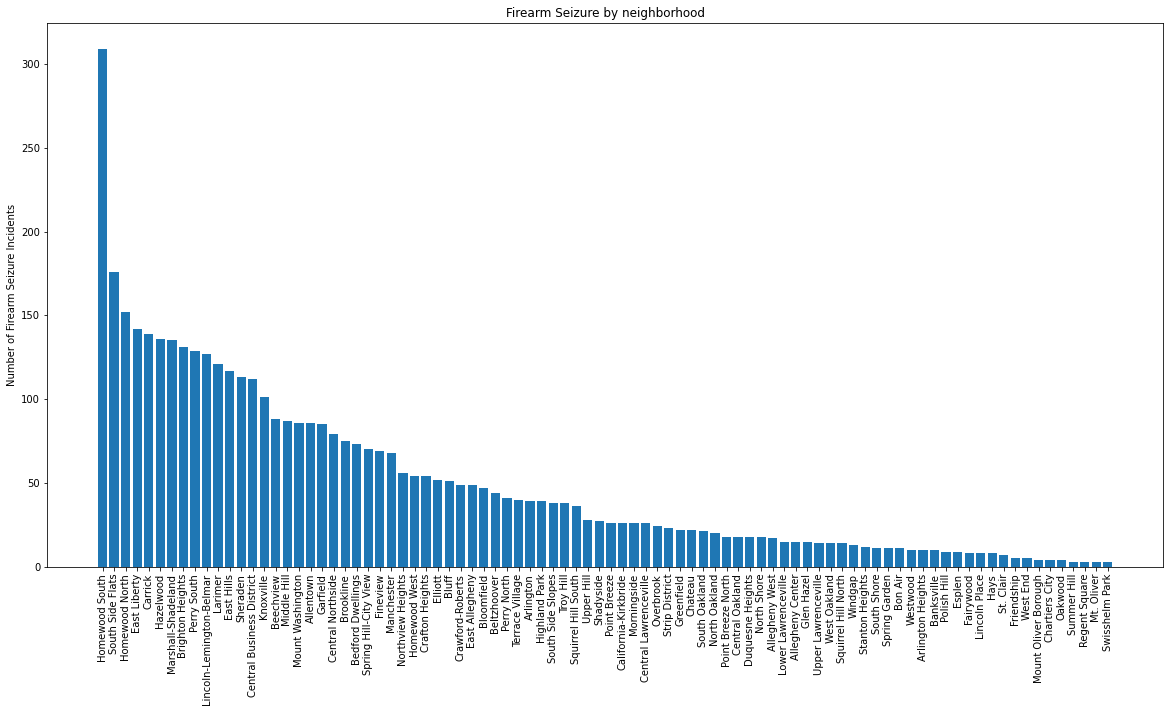

In [91]:
# plotting bar graph of data
# sorting count
sorted_count = dict( sorted(count.items(), key=operator.itemgetter(1),reverse=True))
hoods = list(sorted_count.keys())

# creating bargraph
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(hoods, sorted_count.values())
ax.set_title('Firearm Seizure by neighborhood')
ax.set_ylabel('Number of Firearm Seizure Incidents')
# rotating labels
plt.xticks(rotation=90)
plt.show()

This bargraph is informative, but going even further with the data and breaking up the bars per neighborhood based on type of gun confiscated

# Stacked Bargraph

In [63]:
# pistol_count, revolver_count, shotgun_count, rifle_count, other_count
# creating counts of each of these respective to their neighborhood
num_pistol = dict.fromkeys(neighborhoods, 0)
num_revolver = dict.fromkeys(neighborhoods, 0)
num_shotgun = dict.fromkeys(neighborhoods, 0)
num_rifle = dict.fromkeys(neighborhoods, 0)
num_other = dict.fromkeys(neighborhoods, 0)

for i in firearmDF.index:
    num_pistol[firearmDF["neighborhood"][i]] += firearmDF["pistol_count"][i]
for i in firearmDF.index:
    num_revolver[firearmDF["neighborhood"][i]] += firearmDF["revolver_count"][i]
for i in firearmDF.index:
    num_shotgun[firearmDF["neighborhood"][i]] += firearmDF["shotgun_count"][i]
for i in firearmDF.index:
    num_rifle[firearmDF["neighborhood"][i]] += firearmDF["rifle_count"][i]
for i in firearmDF.index:
    num_other[firearmDF["neighborhood"][i]] += firearmDF["other_count"][i]

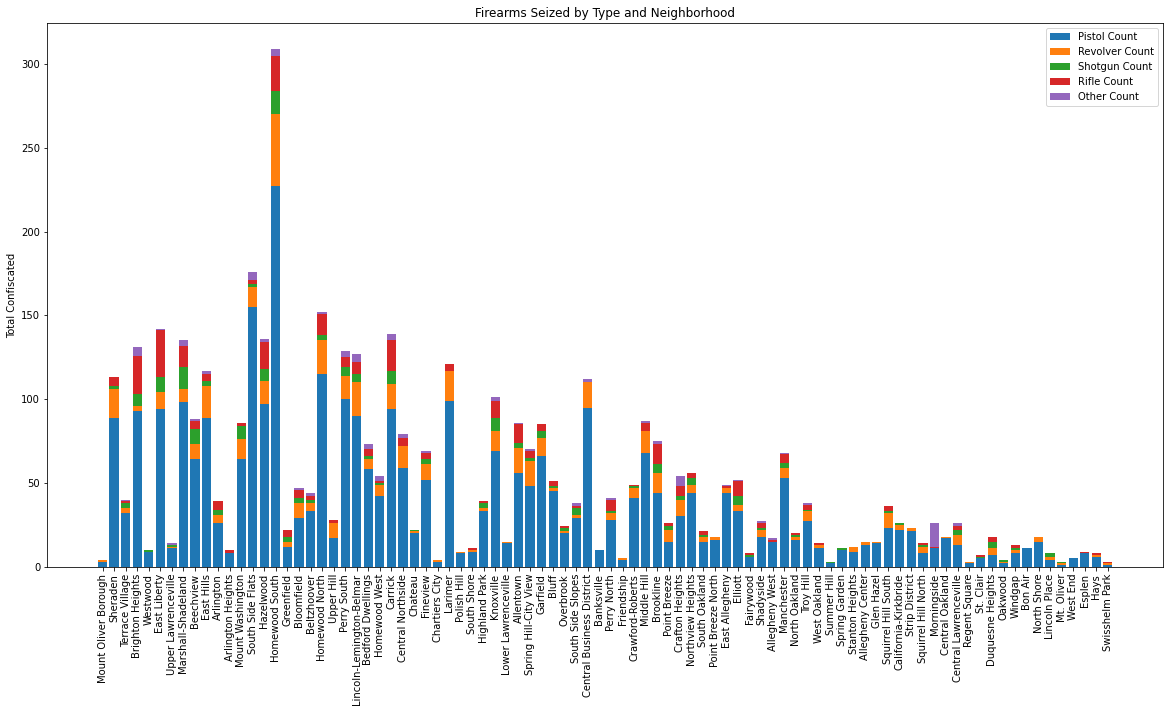

In [86]:
# plotting the new data
neighborhoods
pistol_count = list(num_pistol.values())
revolver_count = list(num_revolver.values())
shotgun_count = list(num_shotgun.values())
rifle_count = list(num_rifle.values())
other_count = list(num_other.values())

# creating bottom bins for the stacked bargraph
b1 = []
b2 = []
b3 = []
for i in range(0,len(neighborhoods)):
    b1.append(pistol_count[i]+revolver_count[i])
    b2.append(pistol_count[i]+revolver_count[i]+shotgun_count[i])
    b3.append(pistol_count[i]+revolver_count[i]+shotgun_count[i]+rifle_count[i])

# creating stacked bargraph
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(neighborhoods, pistol_count, label="Pistol Count")
ax.bar(neighborhoods, revolver_count, bottom=pistol_count, label="Revolver Count")
ax.bar(neighborhoods, shotgun_count, bottom=b1, label="Shotgun Count")
ax.bar(neighborhoods, rifle_count, bottom=b2, label="Rifle Count")
ax.bar(neighborhoods, other_count, bottom=b3, label="Other Count")

ax.set_title('Firearms Seized by Type and Neighborhood')
ax.set_ylabel('Total Confiscated')
ax.legend()
# rotating labels
plt.xticks(rotation=90)
plt.show()

The stacked bargraph is useful in a scenario like this because the type of firearm confiscated is categorical so we can count based on the number in a specific category per neighborhood. From the bargraph, we see neighborhoods like Homestead South and South Side Flats are still the highest. The colors indicate that the most common type of firearm seizure is a pistol followed by revolvers.

# Ranking the neighborhoods


In [102]:
# Homewood South has the most guns confiscated at 309 which will be the baseline for worst neighborhood
# Each remaining neighborhood will be ranked 0-100 based on their guns confiscated relative to 309

final_rankings = dict.fromkeys(neighborhoods, 0)

for key in count:
    final_rankings[key] = (count[key] / 309) * 100

final_rankings = dict( sorted(final_rankings.items(), key=operator.itemgetter(1),reverse=True))
final_rankings

{'Homewood South': 100.0,
 'South Side Flats': 56.957928802588995,
 'Homewood North': 49.19093851132686,
 'East Liberty': 45.9546925566343,
 'Carrick': 44.983818770226534,
 'Hazelwood': 44.01294498381877,
 'Marshall-Shadeland': 43.689320388349515,
 'Brighton Heights': 42.394822006472495,
 'Perry South': 41.74757281553398,
 'Lincoln-Lemington-Belmar': 41.10032362459547,
 'Larimer': 39.15857605177994,
 'East Hills': 37.86407766990291,
 'Sheraden': 36.56957928802589,
 'Central Business District': 36.24595469255664,
 'Knoxville': 32.68608414239482,
 'Beechview': 28.478964401294498,
 'Middle Hill': 28.155339805825243,
 'Mount Washington': 27.831715210355988,
 'Allentown': 27.831715210355988,
 'Garfield': 27.508090614886733,
 'Central Northside': 25.5663430420712,
 'Brookline': 24.271844660194176,
 'Bedford Dwellings': 23.624595469255663,
 'Spring Hill-City View': 22.653721682847898,
 'Fineview': 22.330097087378643,
 'Manchester': 22.006472491909385,
 'Northview Heights': 18.12297734627832,


From the rankings we see that based on this metric, the top 3 worst neighborhoods are Homewood South, South Side Flats, and Homewood North
The top 3 best neighborhoods are Swisshelm Park, Mt. Oliver, and Regen Square